<header>
     <img src="header.png"  alt="Hedaar" height="200" width="700">                                 
</header>

### Analyzing the Stroop Effect
Perform the analysis in the space below. Remember to follow [the instructions](https://docs.google.com/document/d/1-OkpZLjG_kX9J6LIQ5IltsqMzVWjh36QpnP2RYpVdPU/pub?embedded=True) and review the [project rubric](https://review.udacity.com/#!/rubrics/71/view) before submitting. Once you've completed the analysis and write-up, download this file as a PDF or HTML file, upload that PDF/HTML into the workspace here (click on the orange Jupyter icon in the upper left then Upload), then use the Submit Project button at the bottom of this page. This will create a zip file containing both this .ipynb doc and the PDF/HTML doc that will be submitted for your project.


<p><span style="background-color: #dfe6e9;">Q1: What is the independent variable? What is the dependent variable&nbsp;</span></p>
<table style="height: 63px;" width="500">
<tbody>
<tr>
<td style="width: 242px; background-color: #7ed6df; text-align: center;"><strong>Independent variable</strong></td>
<td style="width: 242px; background-color: #7ed6df; text-align: center;"><strong>Dependent variable</strong></td>
</tr>
<tr>
<td style="width: 242px; text-align: center;">Test Result ( congruent and incongruent )</td>
<td style="width: 242px; text-align: center;">Estimated time for each case&nbsp;</td>
</tr>
</tbody>
</table>


In [6]:
# Import important libraries
import pandas as pd
import numpy as np
from scipy import stats
import math
import matplotlib.pyplot as plt
%matplotlib inline

#Read the dataset
color = pd.read_csv('stroopdata.csv')
color.head()

,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214
3,8.630,15.687
4,14.669,22.803


In [3]:
color.shape

(24, 2)

<p><span style="background-color: #dfe6e9;">Q2: What is an appropriate set of hypotheses for this task? Specify your null and alternative hypotheses, and clearly define any notation used. Justify your choices.</span></p>
<p>&nbsp;</p>


In a Stroop test, participants are presented with a list of words, with each word displayed in a color of ink. This is a sample of the population that represents the test result. 
This sample has n=24 test estimated time in each case (congruent and incongruent). The population parameter for the mean of congruent reading times represented as μC and population parameter for the mean of incongruent reading times represented as μI
    
- Null hypotheses (H_0): Assumed there is no difference in time needed to read a congruent displayed text to a incongruent displayed text.  (μC − μI = 0)

- Alternative hypotheses (H_A): Assumed there is a significantly different in the time needed to read a congruent displayed text to a incongruent displayed text.
(μC − μI != 0)


<p><span style="background-color: #dfe6e9;">Q3: Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability. The name of the data file is 'stroopdata.csv'.</span></p>

<table style="height: 229px; width: 548px;">
<tbody>
<tr>
<td style="width: 688px; background-color: #7ed6df; text-align: center;" colspan="3"><strong>Measures of central tendency&nbsp;</strong></td>
</tr>
<tr>
<td style="background-color: #ffffff; width: 108px;">&nbsp;</td>
<td style="background-color: #fab1a0; text-align: center; width: 108px;"><strong>Congruent</strong></td>
<td style="background-color: #fab1a0; text-align: center; width: 108px;"><strong>&nbsp;Incongruent&nbsp;</strong></td>
</tr>
<tr>
<td style="background-color: #fff0aa; width: 290px;"><strong><strong>Mean (</strong></strong><strong>x̅)</strong></td>
<td style="width: 208px; text-align: center;">
 14.05 
</td>
<td style="width: 190px; text-align: center;">
 22.02&nbsp; 
</td>
</tr>
<tr>
<td style="background-color: #fff0aa; width: 290px;"><strong>Median&nbsp;</strong></td>
<td style="width: 208px; text-align: center;">
 14.36 
</td>
<td style="width: 190px; text-align: center;">
 21.02 
</td>
</tr>
<tr>
<td style="background-color: #fff0aa; width: 290px;"><strong>Mode&nbsp;</strong></td>
<td style="width: 208px; text-align: center;">
 8.63&nbsp; 
</td>
<td style="width: 190px; text-align: center;">
 15.69 
</td>
</tr>
<tr>
<td style="width: 688px; background-color: #7ed6df; text-align: center;" colspan="3">&nbsp;<strong>Measures of variability</strong></td>
</tr>
<tr>
<td style="background-color: #fff0aa; width: 290px;"><strong>Rang</strong></td>
<td style="width: 208px; text-align: center;">
 13.69&nbsp; 
</td>
<td style="width: 190px; text-align: center;">
19.57
</td>
</tr>
<tr>
<td style="background-color: #fff0aa; width: 290px;"><strong><strong>Interquartile range (IQR)</strong></strong></td>
<td style="width: 208px; text-align: center;">
 4.30 
</td>
<td style="width: 190px; text-align: center;">
 5.33 
</td>
</tr>
<tr>
<td style="background-color: #fff0aa; width: 290px;"><strong>Standard Deviation (&sigma;)</strong></td>
<td style="width: 208px; text-align: center;">
3.55&nbsp;
</td>
<td style="width: 190px; text-align: center;">
 4.80 
</td>
</tr>
</tbody>
</table>

In [20]:
"""
This function is very useful to generate descriptive statistics that summarize the central tendency
, dispersion, and shape of a dataset’s distribution, excluding NaN values. 
(https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.describe.html)
"""
color.describe()

,Congruent,Incongruent
count,24.000000,24.000000
mean,14.051125,22.015917
std,3.559358,4.797057
min,8.630000,15.687000
25%,11.895250,18.716750
50%,14.356500,21.017500
75%,16.200750,24.051500
max,22.328000,35.255000


In [21]:
"""
The previous function doesn't calculate the mode, so this is a good way to calculate it
by using stats from Scipy library.
(http://www.datasciencemadesimple.com/mode-function-python-pandas-dataframe-row-column-wise-mode/)
The method returns an array contain the mode for each column
"""
stats.mode(color)

ModeResult(mode=array([[  8.63 ,  15.687]]), count=array([[1, 1]]))

In [13]:
# Range 
C_range = color['Congruent'].max() - color['Congruent'].min()
print("Congruent Range = ",C_range)

I_range = color['Incongruent'].max() - color['Incongruent'].min()
print("Incongruent Range = ",I_range)

Congruent Range =  13.698
Incongruent Range =  19.568


In [9]:
# Interquartile range (IQR)
C_q1 = color['Congruent'].quantile(.25)
C_q3 = color['Congruent'].quantile(.75)
print("Congruent IQR = ",C_q3 - C_q1)


I_q1 = color['Incongruent'].quantile(.25)
I_q3 = color['Incongruent'].quantile(.75)
print("Incongruent IQR = ",I_q3 - I_q1)

Congruent IQR =  4.3054999999999986
Incongruent IQR =  5.33475


<p><span style="background-color: #dfe6e9;">Q4: Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.</span></p>

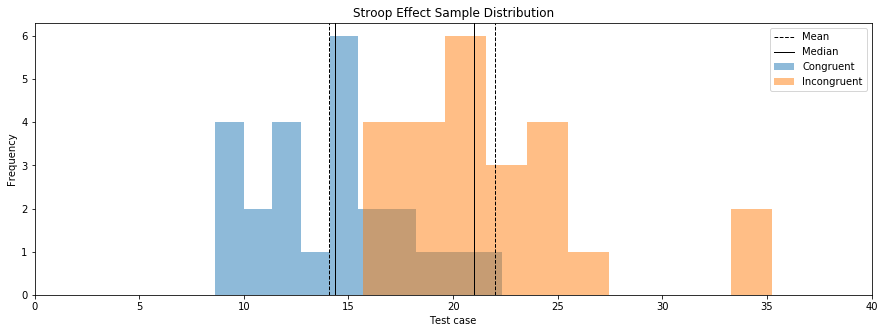

In [69]:
Congruent = color.Congruent
Incongruent = color.Incongruent


#Figure size 
plt.figure(figsize=(15,5))
#Title of the plot
plt.title("Stroop Effect Sample Distribution")



#plot 1 (Congruent) we set set alpha = 0.5 to reduce the chart opacity
plt.hist(Congruent, alpha=0.5, label='Congruent')
# This function set a dotted line in the mean of the data
plt.axvline(Congruent.mean(), color='k', linestyle='dashed', linewidth=1,label='Mean')
plt.axvline(Congruent.median(), color='k', linestyle='solid', linewidth=1,label='Median')

#plot 2 (Incongruent)
plt.hist(Incongruent, alpha=0.5, label='Incongruent',)
plt.axvline(Incongruent.mean(), color='k', linestyle='dashed', linewidth=1)
plt.axvline(Incongruent.median(), color='k', linestyle='solid', linewidth=1)

# Legend position
plt.legend(loc='upper right')

# Labels title
plt.xlabel('Test case')
plt.ylabel('Frequency')

"""
This function set the range of x values because there are differences between bins size 
(the default start from  is 0 to 10 then 10 to 15) 
"""
plt.xlim(0, 40)
plt.show()

- Let's first talking about the Congruent distribution the shape of this variable is right-skewed, the range values of this variable approximately between 8 and 23. The mean of it is 14 median is 14.3, and there are no outliers.</span>

- Second, the shape of the Incongruent distribution variable is also right-skewed. The range between 16 to 35 and it's affected by the outliers in 35. the mean equal 25, the median equal 23.

<p><span style="background-color: #dfe6e9;">Q5: Now, perform the statistical test and report your results. What is your confidence level or Type I error associated with your test? What is your conclusion regarding the hypotheses you set up? Did the results match up with your expectations? **Hint:**  Think about what is being measured on each individual, and what statistic best captures how an individual reacts in each environment.</span></p>

In [15]:
# This is a very good reference 
#(https://machinelearningmastery.com/how-to-code-the-students-t-test-from-scratch-in-python/)
# http://bayes.acs.unt.edu:8083/BayesContent/class/Jon/ISSS_SC/Module008/isss_m8_introttests/node3.html

# 1) Add a new column that contains the difference between the two column
color['diff'] = color['Incongruent'] - color['Congruent']

# Summary of this column 
color['diff'].describe()

count    24.000000
mean      7.964792
std       4.864827
min       1.950000
25%       3.645500
50%       7.666500
75%      10.258500
max      21.919000
Name: diff, dtype: float64

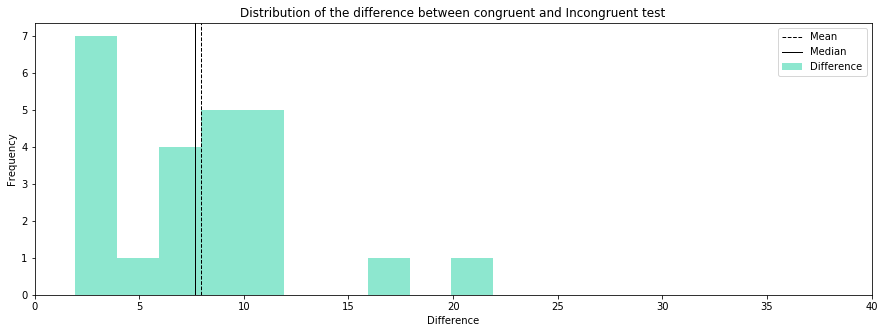

In [67]:
# Histogram of diff column

diff = color['diff'] 

#Figure size 
plt.figure(figsize=(15,5))
#Title of the plot
plt.title("Distribution of the difference between congruent and Incongruent test")

#plot 3 (Difference)
plt.hist(diff, alpha=0.5, label='Difference',color="#1dd1a1")
plt.axvline(diff.mean(), color='k', linestyle='dashed', linewidth=1,label='Mean')
plt.axvline(diff.median(), color='k', linestyle='solid', linewidth=1,label='Median')

# Legend position
plt.legend(loc='upper right')

# Labels title
plt.xlabel('Difference')
plt.ylabel('Frequency')

"""
This function set the range of x values because there are differences between bins size 
(the default start from  is 0 to 10 then 10 to 15) 
"""
plt.xlim(0, 40)
plt.show()

The the difference between congruent and Incongruent test is between 2 and 21, the maen is equal 7.9 and the median is equal 7.6, there are outliers in 16 and 20 and the shape is right-skewed

In [62]:
# 2) Calculate the mean of difference
diff_mean = color['diff'].mean()

# 3) Calculate the Standard deviation of difference
diff_sd = color['diff'].std()

# 4) Calculate the Degree of freedom ( the n is equal in both column)
n = color.shape[0]
df = n - 1 

# 5) Standard error of the difference
sd_error = diff_sd / math.sqrt(n)

# 6) Calculate the t-test
t_test =  diff_mean / sd_error

# 7) The critical value can be calculated using this function is in SciPy
# alpha = 0.05 (95% confidence)
alpha = 0.05
cv = stats.t.ppf(1.0 - alpha, df)


# 8) Calculate the p-value
p = (1 - stats.t.cdf(abs(t_test), df)) * 2


# 9) Results

print(" --------------------------------\n",
      "|     T-test = ",t_test,"  |\n"
     ," --------------------------------\n"
     ,'| p-value = ',p," |\n"
     ," --------------------------------\n"
     ,'|         Alpha = ',alpha,"        |\n"
     ," --------------------------------\n"
     ,'|Critical Value =',cv,"|\n"
     ," --------------------------------\n")

 --------------------------------
 |     T-test =  8.02070694411   |
  --------------------------------
 | p-value =  4.10300058373e-08  |
  --------------------------------
 |         Alpha =  0.05         |
  --------------------------------
 |Critical Value = 1.71387152775 |
  --------------------------------



The p-value is less than the alpha level: p < 0.05 so we reject the Null Hypothesis with a 99% Confidence level, which means we can &lsquo;accept&rsquo; our alternative hypotheses and conclude that there is a significant difference between congruent and incongruent test. This result match up with my expectations.

<p><span style="background-color: #dfe6e9;">Q6: Optional: What do you think is responsible for the effects observed? Can you think of an alternative or similar task that would result in a similar effect? Some research about the problem will be helpful for thinking about these two questions!</span></p>

<p><span style="background-color: #fff0aa;"> After doing some research about the Stroop Effect, the effect of this test is depends on brain processing because when you do the test you focus on the color and the word. The theories related that explain this effect such as:</span></p>

<p>1) The speed of Processing Theory: the interference occurs because words are read faster than colors are named.<br />2) Selective Attention Theory: the interference occurs because naming colors requires more attention than reading words.</p>

<p><span style="background-color: #fff0aa;">More experiments to try:</span></p>

<p>1) Turn the words upside down or rotate them 90 degrees.<br />2) Turn the words "inside out."<br />3) Use emotional words such as "sad" or "happy" or "depressed" or "angry."<br />4) Color only half of the word or color only the first and last letter of each word.</p>

Reference (https://faculty.washington.edu/chudler/words.html)

In [4]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Test a Perceptual Phenomenon.ipynb'])

0

<header>
     <img src="footer.png"  alt="Hedaar" height="200" width="700">                                 
</header>